In [1]:
import geopandas as gpd

In [2]:
import geopandas as gpd
import pandas as pd
import fiona

In [6]:
# import required packages
import geopandas as gpd
import pandas as pd
import fiona

In [7]:
#load .gdb connection - NOTE: this points directory to your MSI home folder and Tier 1 storage. If the file is elsewhere you may need to do some additional directory pointing.
gdb_path = "nasispedonsAK.gdb"

In [8]:
#get a list of layers in the .gdb
layers = fiona.listlayers(gdb_path)

In [9]:
#print them to view
for layer in layers: 
   print(layer) 

ncsslayerlabdata
ncsspedonlabdata
pediagfeatures
pedon
pefmp
pehydricfieldindicator
peinfiltrationch
peinfiltrationchdata
peinfiltrationfh
peinfiltrationfhdata
peinfiltrationsummary
pepenetrationresistance
perestrictions
pesoilstability
petaxhistfmmin
petaxhistmoistcl
petaxhistory
petext
petxhistfmother
phcemagent
phcoledata
phcolor
phconccolor
phconcs
phcracks
phdb
phdbcompliantcavity
phdbcore
phdbcorereading
phdbscoop
phdbscoopreading
phdesgnsuffix
phfeatcolor
phfeatures
phfmp
phfrags
phgrcountdata
phgrcountsummary
phhuarts
phhydrometeranalysis
phhydrometerdata
phksatamoozedata
phksatamoozemeter
phksatring
phksatringdata
phksatsummary
phlabresults
phmottles
phorizon
phpores
phpvsf
phpvsfcolor
phrdxfeatures
phredoxfcolor
phroots
phsample
phstructure
phtext
phtexture
phtexturemod
site
siteaoverlap
siteassocsoi
sitebedrock
siteecositehistory
siteerosionacc
sitegeomordesc
siteiristubedata
sitemuoverlap
siteobs
siteobstext
siteothvegclass
sitepm
sitesoilmoist
sitesoiltemp
sitesurffrags
si

In [11]:
# create an object that points to one specific layer - NOTE: here I am pointing to the "pedon" layer, which contains the geometry (lat lon) and many other site level variables
gdf = gpd.read_file(gdb_path, layer="pedon") 

# inspect the head
print(gdf.head()) 

# inspect the columns
print(gdf.columns)

   siteobsiidref        upedonid    pedrecorigin       descname taxonname  \
0        1882228  TNF_NFVEG_4798  USFS NRM pedon  Jennifer A Nu      None   
1        1881710  TNF_NFVEG_4799  USFS NRM pedon  Jennifer A Nu      None   
2        1882881  TNF_NFVEG_4800  USFS NRM pedon  Jennifer A Nu      None   
3        1883259  TNF_NFVEG_4801  USFS NRM pedon  Jennifer A Nu      None   
4        1882958  TNF_NFVEG_4802  USFS NRM pedon  Jennifer A Nu      None   

  localphase taxclname taxonkind pedontype pedonpurpose  ...  sasexposureend  \
0       None      None      None      None         None  ...             NaT   
1       None      None      None      None         None  ...             NaT   
2       None      None      None      None         None  ...             NaT   
3       None      None      None      None         None  ...             NaT   
4       None      None      None      None         None  ...             NaT   

  pedbiidref grpiidref              objwlupdated objuser

In [12]:
# genberate a table that shows the number of records in each table
# Get a list of layers in the .gdb
layers = fiona.listlayers(gdb_path)

# Initialize a list to hold layer names and their respective counts
layer_counts = []

# Iterate through each layer and count the records
for layer in layers:
    gdf = gpd.read_file(gdb_path, layer=layer)
    record_count = len(gdf)
    layer_counts.append({'Layer': layer, 'Record Count': record_count})

# Convert the list to a DataFrame
counts_df = pd.DataFrame(layer_counts)

# Display the DataFrame
print(counts_df)

/users/2/jeli0026/.local/lib/python3.8/site-packages/geopandas/io/file.py:383: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  as_dt = pd.to_datetime(df[k], errors="ignore")


                     Layer  Record Count
0         ncsslayerlabdata          3154
1         ncsspedonlabdata          3154
2           pediagfeatures             0
3                    pedon         34661
4                    pefmp          8564
..                     ...           ...
79     soiltempmonitordata             0
80                transect         23345
81  transectestcomposition            95
82            transecttext           750
83           MetadataTable          2479

[84 rows x 2 columns]


*NOTE from warning above: The warning you're seeing is related to how pandas is trying to infer date formats when reading from your GeoDataFrame. This warning doesn't indicate a failure, but it can be annoying and might suggest that there are columns with date-like data that aren't being parsed as expected.

Here’s some ways to address this issue:
# Suppress the Warning: If the warning is not affecting your results and you just want to suppress it, you can use the warnings library:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

*Place this at the beginning of your script, before you read any layers.

# Specify Date Formats: If you want to ensure proper date parsing, you can explicitly specify the format when loading your data. However, since GeoPandas does not allow for specifying formats directly when reading layers, you might need to handle this after loading each layer.

import geopandas as gpd
import fiona
import pandas as pd
import warnings

# Suppress UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load .gdb connection
gdb_path = "nasispedonsAK.gdb"

# Get a list of layers in the .gdb
layers = fiona.listlayers(gdb_path)

# Initialize a list to hold layer names and their respective counts
layer_counts = []

# Iterate through each layer and count the records
for layer in layers:
    gdf = gpd.read_file(gdb_path, layer=layer)
    
    # Optionally, convert specific date columns if needed
    # For example, if you have a column named 'date_column':
    # gdf['date_column'] = pd.to_datetime(gdf['date_column'], format='%Y-%m-%d', errors='coerce')
    
    record_count = len(gdf)
    layer_counts.append({'Layer': layer, 'Record Count': record_count})

# Convert the list to a DataFrame
counts_df = pd.DataFrame(layer_counts)

# Display the DataFrame
print(counts_df)
Identify Problematic Columns: If you suspect specific columns are causing the issue, you can check the data types of the GeoDataFrame after loading it:
python
Copy code
print(gdf.dtypes)
This will help you identify any columns that may need special handling.
Summary
Using the warning suppression should resolve the immediate annoyance of the warning. If you're encountering issues with date parsing impacting your analysis, you'll want to address those specific columns after loading the GeoDataFrame.

Let me know if you need further assistance!

In [13]:
#set pandas display options to ensure everything prints visibly and re-run
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
# Display the DataFrame
print(counts_df)

                      Layer  Record Count
0          ncsslayerlabdata          3154
1          ncsspedonlabdata          3154
2            pediagfeatures             0
3                     pedon         34661
4                     pefmp          8564
5    pehydricfieldindicator            79
6          peinfiltrationch             0
7      peinfiltrationchdata             0
8          peinfiltrationfh             0
9      peinfiltrationfhdata             0
10    peinfiltrationsummary             0
11  pepenetrationresistance             0
12           perestrictions          4200
13          pesoilstability             0
14           petaxhistfmmin         22355
15         petaxhistmoistcl         13764
16             petaxhistory         62096
17                   petext          4006
18          petxhistfmother          9712
19               phcemagent            11
20               phcoledata             0
21                  phcolor        128447
22              phconccolor       

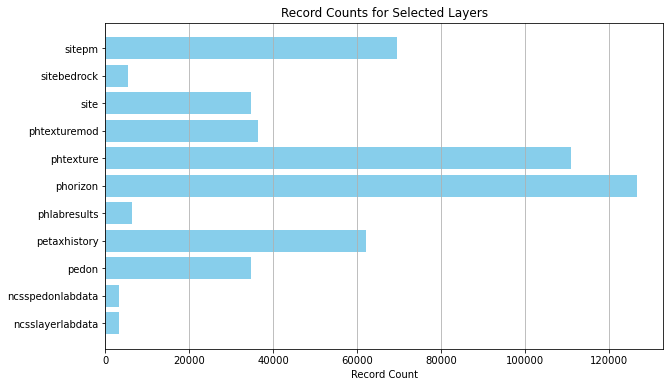

In [14]:
#make a bar chart
import matplotlib.pyplot as plt
# Specify the layers you want to plot
selected_layers = [
    "site", "phorizon", "pedon", "petaxhistory", 
    "phlabresults", "phtexture", "phtexturemod", 
    "sitebedrock", "sitepm", "ncsslayerlabdata", 
    "ncsspedonlabdata"
]

# Filter the DataFrame for the selected layers
filtered_counts_df = counts_df[counts_df['Layer'].isin(selected_layers)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(filtered_counts_df['Layer'], filtered_counts_df['Record Count'], color='skyblue')
plt.xlabel('Record Count')
plt.title('Record Counts for Selected Layers')
plt.grid(axis='x')

# Show the plot
plt.show()

In [15]:
#now extract the geometries from the pedon dataset so you can do some checks for overlaps
gdf = gpd.read_file(gdb_path, layer="pedon") 

# inspect the head
print(gdf.head()) 

# inspect the columns
print(gdf.columns)

# extract the individual components of the geometry objects in the "geometry" field. These objects are currently encoded as: "POINT (-132.01659 56.71297)" in a single field, which I believe can be read into QGIS as "well-known text (WKT)" on csv import. Regradless, I split here for ease of use. May not need to do this later.

# Extract the geometry type, longitude, and latitude using shapely methods
gdf['geom_type'] = gdf.geometry.geom_type  # Extracts 'Point' or other geometry types

# For point geometries, extract longitude (x) and latitude (y)
gdf['geom_lon'] = gdf.geometry.x  # Extracts longitude
gdf['geom_lat'] = gdf.geometry.y  # Extracts latitude

# Now you have the new columns in the GeoDataFrame
print(gdf[['geom_type', 'geom_lon', 'geom_lat']].head())  # View the result

   siteobsiidref        upedonid    pedrecorigin       descname taxonname  \
0        1882228  TNF_NFVEG_4798  USFS NRM pedon  Jennifer A Nu      None   
1        1881710  TNF_NFVEG_4799  USFS NRM pedon  Jennifer A Nu      None   
2        1882881  TNF_NFVEG_4800  USFS NRM pedon  Jennifer A Nu      None   
3        1883259  TNF_NFVEG_4801  USFS NRM pedon  Jennifer A Nu      None   
4        1882958  TNF_NFVEG_4802  USFS NRM pedon  Jennifer A Nu      None   

  localphase taxclname taxonkind pedontype pedonpurpose  ...  sasexposureend  \
0       None      None      None      None         None  ...             NaT   
1       None      None      None      None         None  ...             NaT   
2       None      None      None      None         None  ...             NaT   
3       None      None      None      None         None  ...             NaT   
4       None      None      None      None         None  ...             NaT   

  pedbiidref grpiidref              objwlupdated objuser

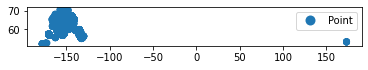

In [16]:
# visualize geometries:
gdf.plot(column='geom_type', legend=True)
plt.show()

In [26]:
# now checking for overlaps
# Extract longitude and latitude
gdf['geom_lon'] = gdf.geometry.x
gdf['geom_lat'] = gdf.geometry.y

# Check for duplicates based on longitude and latitude
duplicates = gdf[gdf.duplicated(subset=['geom_lon', 'geom_lat'], keep=False)]

# Inspect the duplicates - long list so commenting out
# print(duplicates[['geom_lon', 'geom_lat']])

# Count duplicates based on longitude and latitude
duplicate_counts = (gdf.groupby(['geom_lon', 'geom_lat'])
                    .size()
                    .reset_index(name='count'))

# Filter for duplicates (count > 1)
duplicates = duplicate_counts[duplicate_counts['count'] > 1]

# Inspect the result
print(duplicates)

# get a total count of duplicates by lat lon
# Total count of duplicates
total_duplicates = duplicates['count'].sum()

# Output the result
print(f"Total count of duplicate points: {total_duplicates}")

         geom_lon   geom_lat  count
152   -170.271831  57.129036      2
191   -170.256028  57.193786      2
519   -165.244917  61.333306      2
520   -165.138806  61.361639      2
524   -164.914333  61.544750      2
525   -164.709717  66.360832      2
529   -164.456665  66.563889      2
1582  -160.580278  59.488889      2
1622  -160.572630  61.544676      2
1948  -160.400960  63.847800      2
1956  -160.398611  59.391944      2
2020  -160.368333  59.407500      2
2681  -160.026389  59.849444      2
3107  -159.649995  64.228188      2
3709  -158.906944  59.955556      2
3847  -158.669019  61.541139      2
4017  -158.558889  59.085278      2
4044  -158.554722  59.039167      2
4105  -158.545278  59.038611      2
4121  -158.542222  59.043056      2
4125  -158.541389  59.033056      2
4141  -158.538056  58.837778      2
4147  -158.537222  59.026111      2
4214  -158.507778  59.050278      2
4267  -158.465556  59.073056      2
4269  -158.463056  59.068611      2
4273  -158.462222  59.062222

In [27]:
# now check to see if any of these have the same pedon ids
# Extract longitude and latitude
gdf['geom_lon'] = gdf.geometry.x
gdf['geom_lat'] = gdf.geometry.y

# Check for duplicates based on longitude and latitude
duplicates = gdf[gdf.duplicated(subset=['geom_lon', 'geom_lat','peiid'], keep=False)]

# Inspect the duplicates
print(duplicates[['geom_lon', 'geom_lat', 'peiid']])

Empty DataFrame
Columns: [geom_lon, geom_lat, peiid]
Index: []


In [ ]:
# they do not

In [28]:
# check to see if any have the same site ids
# Extract longitude and latitude
gdf['geom_lon'] = gdf.geometry.x
gdf['geom_lat'] = gdf.geometry.y

# Check for duplicates based on longitude and latitude
duplicates = gdf[gdf.duplicated(subset=['geom_lon', 'geom_lat','siteobsiidref'], keep=False)]

# Inspect the duplicates
print(duplicates[['geom_lon', 'geom_lat', 'siteobsiidref']])

# Count duplicates based on longitude and latitude and site id
duplicate_counts = (gdf.groupby(['geom_lon', 'geom_lat'])
                    .size()
                    .reset_index(name='count'))

# Filter for duplicates (count > 1)
duplicates = duplicate_counts[duplicate_counts['count'] > 1]

# Inspect the result
print(duplicates)

# get a total count of duplicates by lat lon
# Total count of duplicates
total_duplicates = duplicates['count'].sum()

# Output the result
print(f"Total count of duplicate points: {total_duplicates}")

         geom_lon   geom_lat  siteobsiidref
3063  -143.497754  62.887102        1986206
3107  -144.393103  62.698913        1957597
3113  -144.164058  63.040251        1957603
3242  -145.189720  61.593580        2006271
3266  -144.517647  62.735323        1938812
3267  -143.291184  63.006516        1938819
3268  -143.497754  62.887102        1986206
3269  -144.393103  62.698913        1957597
3270  -144.164058  63.040251        1957603
3271  -145.189720  61.593580        2006271
3272  -145.641978  63.081029        2254651
3273  -145.654055  63.083734        2254654
3312  -144.193554  63.047030        1979739
3348  -145.641978  63.081029        2254651
3351  -145.654055  63.083734        2254654
3529  -159.649995  64.228188        1777990
3562  -144.517647  62.735323        1938812
3569  -143.291184  63.006516        1938819
4944  -148.809454  63.604214        1623872
4953  -148.385014  63.371445        1623887
4970  -148.467489  63.386271        1623905
5297  -144.193554  63.047030    

In [ ]:
# so, all of the duplicate points are pedons within the same site, none have the same pedon id

In [29]:
#create an object that points to tax history
gd_petaxhistory = gpd.read_file(gdb_path, layer="petaxhistory") 

# inspect the head
print(gd_petaxhistory.head()) 

# inspect the columns
print(gd_petaxhistory.columns)

   peiidref  seqnum                 classdate   classtype classifier  \
0   1567878     NaN 1992-06-13 00:00:00+00:00  Sampled as       None   
1   1567879     NaN 1992-06-13 00:00:00+00:00  Sampled as       None   
2   1567880     NaN 1992-06-13 00:00:00+00:00  Sampled as       None   
3   1567881     NaN 1992-06-13 00:00:00+00:00  Sampled as       None   
4   1567882     NaN 1992-06-14 00:00:00+00:00  Sampled as       None   

             taxonname localphase           taxonkind seriesstatus taxclname  \
0    Histic Cryaquepts       None  Taxon above family  Established      None   
1  Terric Cryofibrists       None  Taxon above family  Established      None   
2     Typic Cryaquents       None  Taxon above family  Established      None   
3   Aquic Cryofluvents       None  Taxon above family  Established      None   
4  Terric Cryofibrists       None  Taxon above family  Established      None   

   ... taxtempregime taxfamhahatmatcl soiltaxedition psctopdepth pscbotdepth  \
0  ...

In [32]:
# attempt to identify multiple tax hiostory records for each pedon
# Load the pedon and petaxhistory layers
pedon_gdf = gpd.read_file(gdb_path, layer="pedon")
petaxhistory_gdf = gpd.read_file(gdb_path, layer="petaxhistory")

# Count occurrences of peiidref in petaxhistory
peiid_counts = (petaxhistory_gdf['peiidref']
                .value_counts()
                .reset_index(name='count'))

# Rename the columns for clarity
peiid_counts.columns = ['peiid', 'record_count']

# Filter for peiid values with multiple records
multiple_records = peiid_counts[peiid_counts['record_count'] > 1]

# Create a list of record numbers for each peiid
multiple_records['record_numbers'] = multiple_records['peiid'].apply(
    lambda x: petaxhistory_gdf[petaxhistory_gdf['peiidref'] == x].index.tolist()
)

# Final DataFrame with desired information
final_df = multiple_records[['peiid', 'record_count', 'record_numbers']]

# Inspect the result
print(final_df.head())

    peiid  record_count                       record_numbers
0  741425             5  [23193, 23194, 23195, 23196, 23197]
1  741426             5  [23198, 23199, 23200, 23201, 23202]
2  741444             5  [23278, 23279, 23280, 23281, 23282]
3  843706             5       [9174, 9175, 9176, 9177, 9178]
4  741438             5  [23253, 23254, 23255, 23256, 23257]


<ipython-input-32-a5819235a58d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_records['record_numbers'] = multiple_records['peiid'].apply(


In [33]:
#now inspect specific tax records, i.e. for peiid 741425
print(petaxhistory_gdf.loc[23193].to_string())

peiidref                                                   741425
seqnum                                                        NaN
classdate                               2012-05-03 00:00:00+00:00
classtype                                                     Lab
classifier                                                   None
taxonname                                                 21Marka
localphase                                                   None
taxonkind                                                    None
seriesstatus                                                 None
taxclname           Medial over loamy-skeletal Typic Haplocryands
taxorder                                                 Andisols
taxsuborder                                               Cryands
taxgrtgroup                                          Haplocryands
taxsubgrp                                      Typic Haplocryands
taxpartsize                            medial over loamy-skeletal
taxpartsiz

In [34]:
print(petaxhistory_gdf.loc[23194].to_string())

peiidref                                                   741425
seqnum                                                        NaN
classdate                               2020-01-28 00:00:00+00:00
classtype                                                    None
classifier                                         Michael Singer
taxonname                                                 21Marka
localphase                                                   None
taxonkind                                                    None
seriesstatus                                                 None
taxclname           Medial over loamy-skeletal Typic Haplocryepts
taxorder                                              Inceptisols
taxsuborder                                               Cryepts
taxgrtgroup                                          Haplocryepts
taxsubgrp                                      Typic Haplocryepts
taxpartsize                            medial over loamy-skeletal
taxpartsiz

In [35]:
print(petaxhistory_gdf.loc[23195].to_string())

peiidref                                                                                          741425
seqnum                                                                                               NaN
classdate                                                                      2020-10-30 00:00:00+00:00
classtype                                                                                     Correlated
classifier                                                                                        Z. Ash
taxonname                                                                                        21Marka
localphase                                                                                       no data
taxonkind                                                                                     Taxadjunct
seriesstatus                                                                                        None
taxclname           Medial over loamy-skeletal, ferrihy

In [36]:
print(petaxhistory_gdf.loc[23196].to_string())

peiidref                               741425
seqnum                                    NaN
classdate           2006-10-10 00:00:00+00:00
classtype                          Sampled as
classifier                               None
taxonname                             21Marka
localphase                               None
taxonkind                                None
seriesstatus                             None
taxclname                                None
taxorder                                 None
taxsuborder                              None
taxgrtgroup                              None
taxsubgrp                                None
taxpartsize                              None
taxpartsizemod                           None
taxceactcl                               None
taxreaction                              None
taxtempcl                                None
taxmoistscl                              None
taxtempregime                            None
taxfamhahatmatcl                  

In [37]:
print(petaxhistory_gdf.loc[23197].to_string())

peiidref                                                                                        741425
seqnum                                                                                             NaN
classdate                                                                    2023-12-19 00:00:00+00:00
classtype                                                                                   Correlated
classifier                                                                                       Prink
taxonname                                                                                     21Kodiak
localphase                                                                                        None
taxonkind                                                                                       Series
seriesstatus                                                                                 Tentative
taxclname           Medial over loamy-skeletal, ferrihydritic over mixed,

In [41]:
print(pedon_gdf[pedon_gdf['peiid'] == 741425])
print(pedon_gdf[pedon_gdf['peiid'] == 107592])

       siteobsiidref   upedonid pedrecorigin descname taxonname localphase  \
14859         725483  95DV50202      PedonPC       DV  21Kodiak       None   

                                                                                taxclname  \
14859  Medial over loamy-skeletal, ferrihydritic over mixed, superactive Andic Humicryods   

      taxonkind                 pedontype           pedonpurpose  ...  \
14859    Series  Taxadjunct to the series  Soil survey inventory  ...   

       sasexposureend pedbiidref grpiidref              objwlupdated  \
14859             NaT      36871     43662 2024-01-30 22:24:57+00:00   

      objuseriidref recuseriidref              recwlupdated   peiid  \
14859          1720        1720.0 2024-01-30 22:24:30+00:00  741425   

                                                                                                                                                                         pedondescriptionreport  \
14859  <a href="https://na

In [40]:
#summarize final df
# Total number of records in final_df
total_records = len(final_df)

# Count how many records have each unique value of record_count
record_count_summary = final_df['record_count'].value_counts().reset_index()
record_count_summary.columns = ['record_count', 'count']

# Display the total records and the summary
print(f"Total records in final_df: {total_records}")
print("\nSummary of records by record_count:")
print(record_count_summary)

Total records in final_df: 24483

Summary of records by record_count:
   record_count  count
0             2  20804
1             3   2527
2             4   1128
3             5     24


In [43]:
# Load the pedon and petaxhistory layers
horizon_gdf = gpd.read_file(gdb_path, layer="phorizon")
print(horizon_gdf.columns)

Index(['peiidref', 'seqnum', 'hzdept', 'hzdepb', 'hzthk_l', 'hzthk_r',
       'hzthk_h', 'obsmethod', 'hzname', 'desgndisc', 'desgnmaster',
       'desgnmasterprime', 'desgnvert', 'texture', 'stratextsflag',
       'claytotest', 'claycarbest', 'silttotest', 'sandtotest', 'fragvoltot',
       'horcolorvflag', 'obssoimoiststat', 'rupresblkmst', 'rupresblkdry',
       'rupresblkcem', 'rupresplate', 'mannerfailure', 'stickiness',
       'plasticity', 'toughclass', 'penetrres', 'penetorient', 'ksatpedon',
       'ksatstddev', 'ksatrepnum', 'horzpermclass', 'obsinfiltrationrate',
       'phfield', 'phdetermeth', 'effclass', 'effagent', 'carbdevstagefe',
       'carbdevstagecf', 'mneffclass', 'mneffagent', 'reactadipyridyl',
       'dipyridylpct', 'dipyridylloc', 'excavdifcl', 'soilodor',
       'soilodorintensity', 'rmonosulfidep', 'h20230percentreaction',
       'h2o23percentreaction', 'acidvolatilesulfidetest', 'bounddistinct',
       'boundtopo', 'horzvoltotpct_l', 'horzvoltotpct_r', 'hor

In [44]:
# Define the specific peiidref value you're interested in
specific_peiidref = 107592  # Replace with your desired value

# Filter the DataFrame for the specific peiidref
filtered_records = horizon_gdf[horizon_gdf['peiidref'] == specific_peiidref]

# Print the filtered records
print(filtered_records)

        peiidref  seqnum  hzdept  hzdepb  hzthk_l  hzthk_r  hzthk_h obsmethod  \
124438    107592     3.0     0.0    35.0      NaN      NaN      NaN      None   
124439    107592     1.0     0.0    35.0      NaN      NaN      NaN      None   
124440    107592     4.0     0.0    45.0      NaN      NaN      NaN      None   
124441    107592     7.0    80.0   100.0      NaN      NaN      NaN      None   
124442    107592     2.0     5.0    25.0      NaN      NaN      NaN      None   
124443    107592     5.0    45.0    60.0      NaN      NaN      NaN      None   
124444    107592     6.0    35.0    80.0      NaN      NaN      NaN      None   

        hzname  desgndisc  ... horzlatareapct_l horzlatareapct_r  \
124438      Bw        NaN  ...             None             None   
124439      Oi        NaN  ...             None             None   
124440      Bg        NaN  ...             None             None   
124441      Cf        NaN  ...             None             None   
124442     

In [47]:
# Define the specific peiidref value you're interested in
specific_peiidref = 1129464  # Replace with your desired value

# Filter the DataFrame for the specific peiidref
filtered_records = petaxhistory_gdf[petaxhistory_gdf['peiidref'] == specific_peiidref]

# Print the filtered records
print(filtered_records)

      peiidref  seqnum                 classdate classtype  \
7717   1129464     NaN 2015-08-07 00:00:00+00:00     Field   
7718   1129464     NaN 2015-08-07 00:00:00+00:00     Field   

                           classifier taxonname localphase taxonkind  \
7717  Sunny Castillo, Dennis Mulligan       N/A       None    Family   
7718  Sunny Castillo, Dennis Mulligan       N/A       None    Family   

     seriesstatus  \
7717         None   
7718         None   

                                                                   taxclname  \
7717  Coarse-loamy, mixed, superactive, nonacid, pergelic Typic Haploturbels   
7718           Coarse-loamy, mixed, superactive, pergelic Typic Haploturbels   

      ... taxtempregime taxfamhahatmatcl   soiltaxedition psctopdepth  \
7717  ...          None             None  twelfth edition         NaN   
7718  ...          None             None  twelfth edition         NaN   

     pscbotdepth osdtypelocflag              recwlupdated recuseriidref

In [ ]:
# test export notebook to html - note this somehow needs to be run in the command line
jupyter nbconvert --execute --to html Untitled9.ipynb